# Analysis of queue throughput measurements

In [161]:
import pandas as pd

In [162]:
df = pd.read_csv("measurements.csv")

In [163]:
# remove older runs for each version
latest = {}
for v in df["version"].unique():
    df1 = df.loc[df["version"] == v]
    latest[v] = df1['run'].max()

for version, run in latest.items():
    df.drop(df[(df.version == version) & (df.run < run)].index, inplace=True)


In [164]:
def plot_version(profile):
    df1 = df.loc[df["profile"] == profile]
    df2 = df1.pivot(index='items', columns='version', values='throughput')
    df2.plot(title=f"Throughput with profile {profile} (#{run})", style='.-')

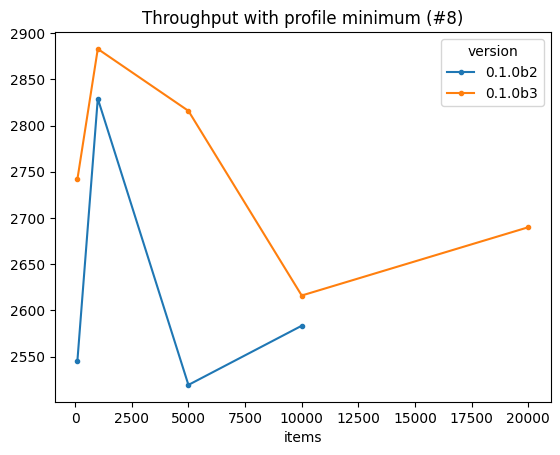

In [165]:
plot_version("minimum")

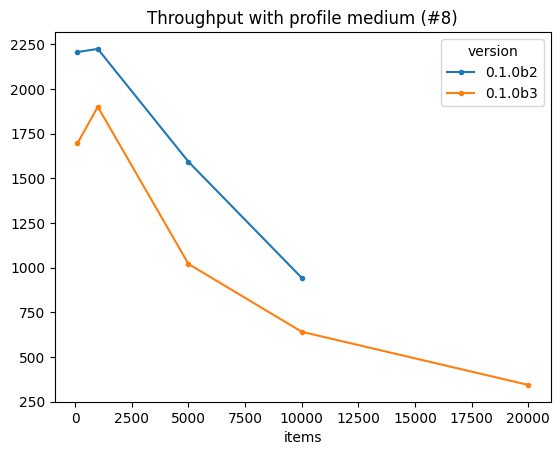

In [166]:
plot_version("medium")

In [ ]:
plot_version("producers")